# Market Indices


In [8]:
#!/usr/bin/env python3.8.10

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as pdr # Work only on ubuntu
from datetime import date
import datetime 

In [3]:
# Stok indices
# from "https://finance.yahoo.com/world-indices"
# ^GSPC: Standard and Poor's 500
# ^DJI: Dow Jones Industrial Index
# ^IXIC: NASDAQ_Composite
# ^RUT: Russel 2000

In [10]:
def log_return(df: pd.DataFrame, column : str = 'Adj Close') -> None:
    """Compute the logarithm return

    Args:
        df (pd.DataFrame): _description_
        column (str, optional): _description_. Defaults to 'Adj Close'.
    """
    # Compute the logarithm return
    y_log = np.log(df[column])
    df['y_lr'] = y_log.diff(periods=1)
    # Compute the percentage logarithm return
    df['y_plr'] = df['y_lr'] * 100.

In [13]:
start = date.today() - datetime.timedelta(weeks=52)
end = date.today()

# Market indices symbols choosen to be analyzed
symbols = ['GSPC', 'DJI', 'IXIC', 'RUT']

for symbol in symbols:
    globals()[f'{symbol}_df'] = pdr.get_data_yahoo(symbols=f'^{symbol}',
                                                   start=start,
                                                   end=end,
                                                  )
    globals()[f'{symbol}_df'].reset_index(inplace=True, drop=False)
    # Compute the logarithm return for each index dataframe
    log_return(globals()[f'{symbol}_df'])


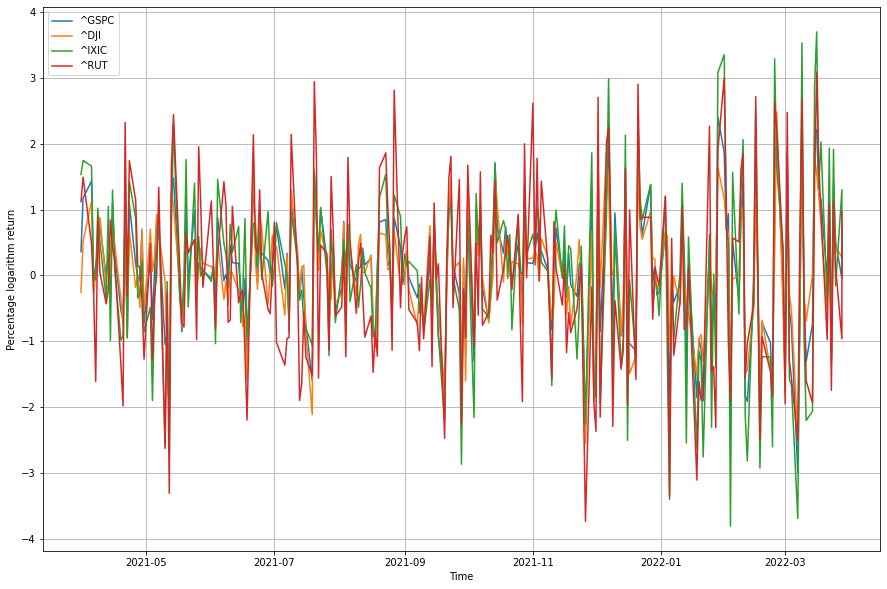

In [6]:
plt.figure(figsize=(15, 10))
for symbol in symbols:
    plt.plot(globals()[f'{symbol}_df']['Date'],
             globals()[f'{symbol}_df']['y_plr'],
             label=f'^{symbol}')

plt.ylabel('Percentage logarithm return')
plt.xlabel('Time')
plt.grid()
plt.legend()